In [13]:
# import necessary packages
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [14]:
# read in JSON
filename = '../JSON/2017-03-21.SA_used.json'
dataSA1 = pd.read_json(filename)
filename2 = '../JSON/2017-04-18.SA_used.json'
dataSA2 = pd.read_json(filename2)

In [15]:
# Remove Duplicates from data
NoDupsDataSA1 = dataSA1.drop_duplicates()
len(NoDupsDataSA1)

NoDupsDataSA2 = dataSA2.drop_duplicates()
len(NoDupsDataSA2)

3690

In [16]:
# Concatinate the two cleaned data frames into one data frame
data = pd.concat([NoDupsDataSA1, NoDupsDataSA2])
data = data.drop_duplicates()
data = data.dropna()
data.reset_index()
len(data)

4658

In [17]:
# clean price data strings and convert to float

data['productPrice'] = data['productPrice'].str.replace('NEGOTIATE','.555')
data['productPrice'] = data['productPrice'].str.replace('Trade','.666')
data['productPrice'] = data['productPrice'].str.replace('SOLD','.777')
data['productPrice'] = data['productPrice'].str.replace('You','.111')
data['productPrice'] = data['productPrice'].str.replace('$','')
data['productPrice'] = data['productPrice'].str.replace('\xa0','')
data['productPrice'] = data['productPrice'].str.replace('.U.S','')
data['productPrice'] = data['productPrice'].str.replace(',','')
data['productPrice'] = data['productPrice'].str.replace('n/a','')
data['productPrice'] = data['productPrice'].str.replace('<a','')
data['productPrice'] = data['productPrice'].str.replace('First','')
data['productPrice'] = data['productPrice'].str.replace('<span','')
data['productPrice'] = data['productPrice'].str.replace('href="item.php?id=84685"><img','')
data['productPrice'] = data['productPrice'].str.split().str[0]
data['productPrice'] = data['productPrice'].str.split('+').str[0]
data['productPrice'] = data['productPrice'].astype(float)


In [18]:
# Sort Data by category
Sorted = data.sort_values(['productCategory'], ascending=False)

# Clean Description
data['productDescription'] = data['productDescription'].str.replace('\t\t\t', '')
data['productDescription'] = data['productDescription'].str.replace('\n', '')
data

,productCategory,productCondition,productDescription,productID,productLink,productLocation,productPrice,productTitle
0,Guitar & Bass,n/a,This is the 2009 Godin Velocity in fantastic c...,93785,http://used.samashmusic.com/item.php?id=93785,"San Diego, CA",429.99,Godin Velocity
1,Guitar & Bass,n/a,This is the 2009 Godin Velocity in fantastic c...,93784,http://used.samashmusic.com/item.php?id=93784,"San Diego, CA",379.99,Godin Velocity
2,Guitar & Bass,n/a,This is an Epiphone Les Paul Standard electric...,93773,http://used.samashmusic.com/item.php?id=93773,"Charlotte, NC",299.99,Epiphone Les Paul Standard
3,Guitar & Bass,n/a,This limited edition 2013 408 (only 50 pieces ...,93682,http://used.samashmusic.com/item.php?id=93682,"Cherry Hill , NJ",2499.99,Paul Reed Smith Ltd Edition 408 Semi-Hollow
4,Guitar & Bass,n/a,Here is a beautiful Gibson Custom Shop 1959 Co...,93660,http://used.samashmusic.com/item.php?id=93660,"Madison, TN",5999.99,"Gibson Les Paul CC#30 'Gabby"""
5,Guitar & Bass,n/a,"This is the Mike Mushok Signature guitar , M...",93684,http://used.samashmusic.com/item.php?id=93684,"San Antonio, TX",499.99,Paul Reed Smith Mike Mushok Signature
6,Guitar & Bass,n/a,This S2 Standard is in fantastic shape. No rea...,93695,http://used.samashmusic.com/item.php?id=93695,"Cherry Hill , NJ",899.99,Paul Reed Smith S2 24 STANDARD
7,Guitar & Bass,n/a,"This is the Buzz Feiten Blues Pro Deluxe ""T"" S...",93673,http://used.samashmusic.com/item.php?id=93673,"San Diego, CA",999.99,Feiten Blues Pro
8,Guitar & Bass,n/a,This Ibanez RG7421PB 7 string guitar is in dec...,93692,http://used.samashmusic.com/item.php?id=93692,"New Haven, CT",199.99,Ibanez RG7421PB
9,Guitar & Bass,n/a,"The Jackson ICJ Electric Guitar , a hot rod m...",93744,http://used.samashmusic.com/item.php?id=93744,"San Antonio, TX",649.99,Jackson JACKSON ICJ


In [19]:
# Questions to explore in data
# Guitar brands - Which brand is most available on market? 
#                 Which brand is considered most valuable?
#                 Mean, Median, Mode Prices for each brand

# Which state provides the most listings?

#

In [20]:
set(data.productCategory)

{'Amps & Effects',
 'Drums & Percussion',
 'Guitar & Bass',
 'Keyboard & MIDI',
 'Microphones',
 'Mixers'}

In [41]:
# DF of all fender guitars
fenders = data['productTitle'].str.contains('Fender')
guitar = data['productCategory'] == 'Guitar & Bass'
fenderDF = data[guitar & fenders]

fenderDF

# get Mean, Median, max, min other data
fenderMean = fenderDF['productPrice'].mean()
fenderMed = fenderDF['productPrice'].median()
fenderMax = fenderDF['productPrice'].max()
fenderMin = fenderDF['productPrice'].min()

expensiveFender = data['productPrice'] == fenderMax
expensiveFender = data[fenders & expensiveFender & guitar]

cheapestFender = data['productPrice'] == fenderMin
cheapestFender = data[fenders & cheapestFender & guitar]

In [40]:
# DF of all Gibson guitars
gibsons = data['productTitle'].str.contains('Gibson')
guitar = data['productCategory'] == 'Guitar & Bass'
gibsonDF = data[gibsons & guitar]

# get mean, median, max, and min on price of gibsonDF
gibsonMean = gibsonDF['productPrice'].mean()
gibsonMedian = gibsonDF['productPrice'].median()
gibsonMax = gibsonDF['productPrice'].max()
gibsonMin = gibsonDF['productPrice'].min()

# Determine most expensive and cheapest
expensiveGibson = data['productPrice'] == gibsonMax
expensiveGibson = data[gibsons & expensiveGibson & guitar]

cheapestGibson = data['productPrice'] == gibsonMin
cheapestGibson = data[gibsons&cheapestGibson&guitar]

gibsonMin,gibsonMax,gibsonMedian,gibsonMean

(429.99000000000001, 9999.9899999999998, 1299.0, 1641.8972804532577)

In [43]:
# DF of all Epiphone Guitars
epiphones = data['productTitle'].str.contains('Epiphone')
guitar = data['productCategory'] == 'Guitar & Bass'
epiphoneDF = data[epiphones & guitar]

# get mean, median, max, and min on price of epiphoneDF
epiphoneMean = epiphoneDF['productPrice'].mean()
epiphoneMedian = epiphoneDF['productPrice'].median()
epiphoneMax = epiphoneDF['productPrice'].max()
epiphoneMin = epiphoneDF['productPrice'].min()

# Determine most expensive and cheapest
expensiveEpiphone = data['productPrice'] == epiphoneMax
expensiveEpiphone = data[epiphones & expensiveEpiphone & guitar]

cheapestEpiphone = data['productPrice'] == epiphoneMin
cheapestEpiphone = data[epiphones&cheapestEpiphone&guitar]

epiphoneMin,epiphoneMax,epiphoneMedian,epiphoneMean

(129.0, 4799.9899999999998, 449.0, 481.03811023622029)

In [44]:
# DF of all Ibanez Guitars
ibanez = data['productTitle'].str.contains('Ibanez')
guitar = data['productCategory'] == 'Guitar & Bass'
ibanezDF = data[ibanez & guitar]

# get mean, median, max, and min on price of ibanezDF
ibanezMean = ibanezDF['productPrice'].mean()
ibanezMedian = ibanezDF['productPrice'].median()
ibanezMax = ibanezDF['productPrice'].max()
ibanezMin = ibanezDF['productPrice'].min()

# Determine most expensive and cheapest
expensiveIbanez = data['productPrice'] == ibanezMax
expensiveIbanez = data[ibanez & expensiveIbanez & guitar]
cheapestIbanez = data['productPrice'] == epiphoneMin
cheapestIbanez = data[ibanez&cheapestIbanez&guitar]

ibanezMin,ibanezMax,ibanezMedian,ibanezMean

(79.989999999999995, 2299.9899999999998, 499.99, 601.77276595744661)

In [25]:
# DF of all Microphones
mic = data['productCategory'] == 'Microphones'
microphonesDF = data[mic]

micMean = microphonesDF['productPrice'].mean()
micMedian = microphonesDF['productPrice'].median()
micMax = microphonesDF['productPrice'].max()
micMin = microphonesDF['productPrice'].min()

micMin, micMax, micMedian, micMean

(14.99, 10999.99, 129.99, 317.12485294117647)

In [36]:
# Find Most expensive and Cheapest Microphone
mic = data['productCategory'] == 'Microphones'

mostExpensiveMic = data['productPrice'] == micMax
mostExpensiveMic = data[mostExpensiveMic & mic]

cheapestMic = data['productPrice'] == micMin
cheapestMic = data[cheapestMic & mic]


cheapestMic

,productCategory,productCondition,productDescription,productID,productLink,productLocation,productPrice,productTitle
2475,Microphones,n/a,"Fair condition, light wear.",96759,http://used.samashmusic.com/item.php?id=96759,"New Haven, CT",14.99,CAD SA-70


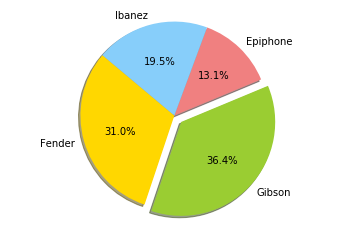

In [46]:
# Data to plot
labels = 'Fender', 'Gibson', 'Epiphone', 'Ibanez'
sizes = [len(fenderDF), len(gibsonDF), len(epiphoneDF), len(ibanezDF)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [ ]:
# list most expensive and cheapest products